In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [12]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.2
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [13]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [14]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [15]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


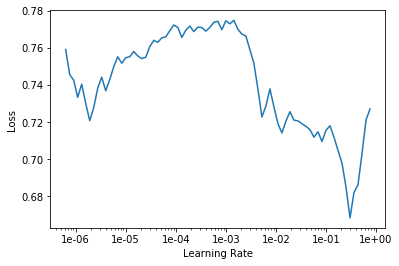

In [16]:
learn.recorder.plot()

In [17]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.659730    0.656468    0.579151  (00:09)
2      0.729456    0.626453    0.606178  (00:07)
3      0.721365    0.639046    0.633205  (00:07)
4      0.711249    0.609352    0.706564  (00:07)



In [18]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:20
epoch  train_loss  valid_loss  accuracy
1      0.591822    0.578928    0.706564  (00:23)
2      0.599225    0.487767    0.803089  (00:24)
3      0.614122    0.420950    0.864865  (00:20)
4      0.607879    0.460563    0.795367  (00:19)
5      0.604883    0.409207    0.841699  (00:20)
6      0.535800    0.366966    0.895753  (00:24)
7      0.550126    0.384120    0.884170  (00:20)
8      0.515089    0.413155    0.880309  (00:24)
9      0.517732    0.374503    0.899614  (00:21)
10     0.463758    0.347378    0.903475  (00:23)
11     0.513057    0.317697    0.911197  (00:19)
12     0.491132    0.302829    0.911197  (00:20)
13     0.422863    0.320917    0.903475  (00:22)
14     0.423982    0.294646    0.899614  (00:22)
15     0.408481    0.296211    0.884170  (00:24)
16     0.412094    0.276052    0.899614  (00:21)
17     0.393269    0.242918    0.911197  (00:22)
18     0.429621    0.321809    0.891892  (00:18)
19     0.348424    0.251068    0.903475  (00:24)
20     0.35

In [19]:
learn.validate()

[0.23999238, tensor(0.9112)]

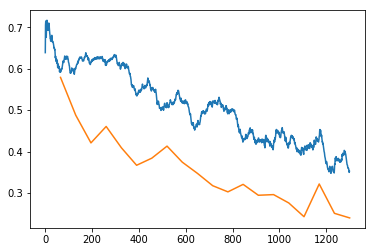

In [20]:
learn.recorder.plot_losses()

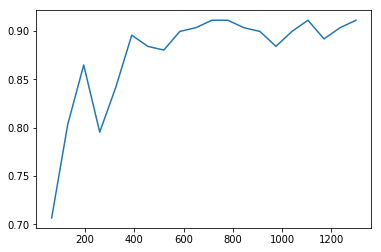

In [21]:
learn.recorder.plot_metrics()

In [22]:
import torch

torch.cuda.empty_cache()